# Capstone Project Introduction Part 2

Having experimented with the NLTK library and rudimentary generative models in Part 1 greater light was shed on the Presidential Primary debates. Part 2 aims to further elaborate with more investigation and experimentation with Natural Language Processing techniques. The final aims is to see whether the candidates' language from the debates can gain predictive insight into their language on Twitter. This leap across data boundaries will then define the direction of the final Capstone Report.

In [2]:
import pandas as pd
df = pd.read_csv('data/debate.csv', encoding = "ISO-8859-1")
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob.classifiers import NaiveBayesClassifier
%matplotlib notebook

In [3]:
df.head()

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/16
1,2,Audience,(APPLAUSE),9/26/16
2,3,Clinton,"How are you, Donald?",9/26/16
3,4,Audience,(APPLAUSE),9/26/16
4,5,Holt,Good luck to you.,9/26/16


In [5]:
cl_list = []

def remove_words(input):
    words = ['donald', 'clinton', 'trump', 'hillary', 'his', 'her', "she's", 'she', 'he', "he's"]
    querywords = input.split()

    resultwords  = [word for word in querywords if word.lower() not in words]
    result = ' '.join(resultwords)
    return result 

for index, row in df.iterrows():
    if row[1] == 'Clinton':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Clinton'))
    elif row[1] == 'Trump':
        text = remove_words(row[2])
        cl_list.append((text.lower(), 'Trump'))

In [5]:
length = len(cl_list)
split = int(length*4/5)

In [6]:
train=cl_list[:split]
test=cl_list[split:]

In [7]:
cl = NaiveBayesClassifier(train)

In [8]:
print(cl.accuracy(test))

0.775


In [9]:
cl.show_informative_features(25)

Most Informative Features
        contains(worked) = True           Clinto : Trump  =     11.8 : 1.0
          contains(part) = True           Clinto : Trump  =     10.8 : 1.0
           contains(bad) = True            Trump : Clinto =     10.2 : 1.0
      contains(disaster) = True            Trump : Clinto =     10.2 : 1.0
      contains(everyone) = True           Clinto : Trump  =      9.9 : 1.0
      contains(security) = True           Clinto : Trump  =      8.9 : 1.0
         contains(still) = True           Clinto : Trump  =      8.9 : 1.0
       contains(support) = True           Clinto : Trump  =      8.2 : 1.0
          contains(paid) = True           Clinto : Trump  =      8.0 : 1.0
      contains(military) = True           Clinto : Trump  =      8.0 : 1.0
          contains(vote) = True           Clinto : Trump  =      8.0 : 1.0
          contains(home) = True           Clinto : Trump  =      7.1 : 1.0
         contains(tried) = True           Clinto : Trump  =      7.1 : 1.0

Having used TextBlob to run a Naive Bayes Classifier on the Presidential text, while eliminating trivial words, we can yield even greater insight into how the use of vocabulary has differentied the respective candidates. Clinton's greater lexical diversity as indicated in the Data Story is demonstrated most here. Given a much greater volume of text and more udnerstanding of the technology perhaps a vectorised model could be trained to spot an even greater depth of features and perhaps a generative model could be trained also. In light of my current limitations I will stop here, but I think a great deal of previously unrecognised insight has been revealed on this dataset with just this brief and experimental approach.

In [10]:
df_tweets = pd.read_csv('data/tweets.csv')
tweet_list = []

for index, row in df_tweets.iterrows():
    if row[1] == 'HillaryClinton':
        text = remove_words(row[2])
        tweet_list.append((text.lower(), 'Clinton'))
    elif row[1] == 'realDonaldTrump':
        text = remove_words(row[2])
        tweet_list.append((text.lower(), 'Trump'))


In [11]:
print(cl.accuracy(tweet_list))


0.5040347610180013


After having wrangled the tweets it seems that the trained classifier from the debates yields no greater insight into the language used in tweets than a coin-flip! Surprised? Well... let's train a classifier on the Tweets themselves and see what vocabulary is more predictive.

In [12]:
length = len(tweet_list)
split = int(length*4/5)
train_tweets=tweet_list[:split]
test_tweets=tweet_list[split:]

In [13]:
tweet_cl = NaiveBayesClassifier(train_tweets)

In [14]:
print(tweet_cl.accuracy(test_tweets))

0.8828549262994569


In [15]:
tweet_cl.show_informative_features(50)

Most Informative Features
         contains(media) = True            Trump : Clinto =     76.4 : 1.0
           contains(wow) = True            Trump : Clinto =     38.5 : 1.0
         contains(enjoy) = True            Trump : Clinto =     37.8 : 1.0
     contains(wisconsin) = True            Trump : Clinto =     34.0 : 1.0
           contains(cnn) = True            Trump : Clinto =     33.2 : 1.0
         contains(total) = True            Trump : Clinto =     24.0 : 1.0
          contains(it’s) = True           Clinto : Trump  =     23.3 : 1.0
        contains(bernie) = True            Trump : Clinto =     22.9 : 1.0
  contains(demsinphilly) = True           Clinto : Trump  =     20.9 : 1.0
      contains(colorado) = True            Trump : Clinto =     20.6 : 1.0
         contains(we’re) = True           Clinto : Trump  =     19.7 : 1.0
          contains(kids) = True           Clinto : Trump  =     18.5 : 1.0
        contains(border) = True            Trump : Clinto =     18.4 : 1.0

We can see from the predictive features of the text in the tweets that Donald Trump's use of words is much more radicalised. He repeatedly calls out his opponents, Republican and Democrat, by name, and uses much more divise, colloquial and extreme language. It's well known that Trump's shrewd use of social media, with Cambridge Analytics in particular, helped to propel him in the polls. Dissociative Identity Disorder or Crazy like a Fox? Probably the latter!

In [6]:
df_tweets = pd.read_csv('data/tweets.csv')
h_tweet_str = " "
t_tweet_str = " "
import re 

def remove_link(input):
    result = re.sub(r'http\S+','', input)
    return result

for index, row in df_tweets.iterrows():
    if row[1] == 'HillaryClinton':
        text = remove_words(row[2])
        text = remove_link(text)
        h_tweet_str += text.lower()
    elif row[1] == 'realDonaldTrump':
        text = remove_words(row[2])
        text = remove_link(text)
        t_tweet_str += text.lower()

<IPython.core.display.Javascript object>


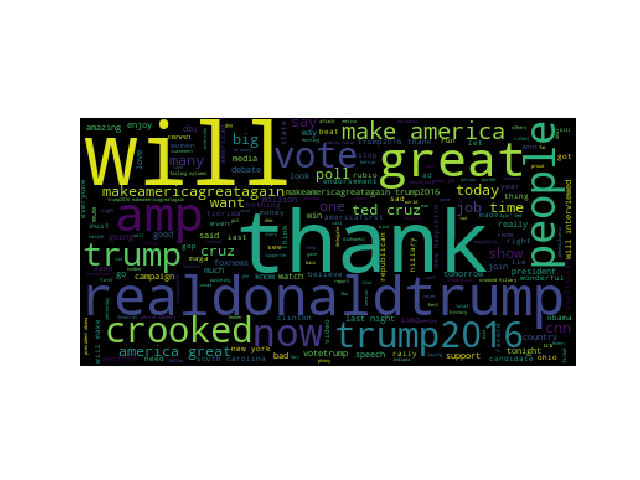

In [23]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
#plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=70).generate(t_tweet_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can see that Trump's tweet word cloud is significantly different from the word cloud prodocued in the Presidential debates. Phrases we all remember like 'Make America Great Again' and 'Crooked Hillary' feature alongside 'Fake News' and Obama, CNN and Ted Cruz. This is all much more what we associate with the 'saga' of the debate, with Trump being the angry populist championing the cause of the downtrodden masses against the establishment. Maybe it has become easier for meaningful views to be expressed via social media than on TV. 

<IPython.core.display.Javascript object>


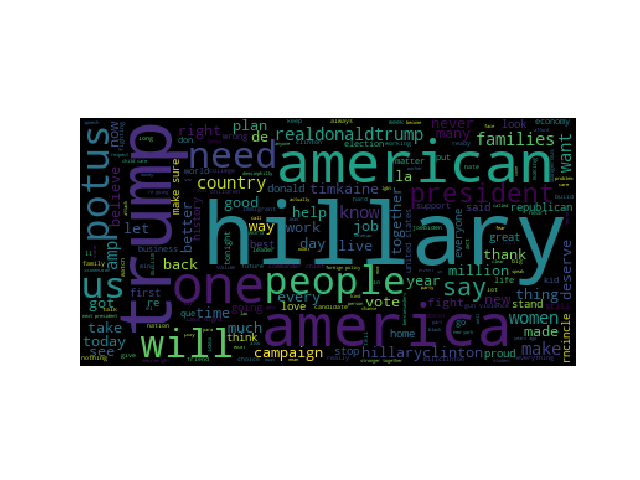

In [24]:
#plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=70).generate(h_tweet_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In contrast we can see that Hillary's tweets are more measured. There is nothing in here conveying emnity or radical change. It's all very much what one would expect from a centre left politician. Trump's Word Cloud is much more 'remarkable' than Hillary's which again reflects the rise of social media and digital marketing in politics. Seth Godin would be much more likely to approve of Trump's tweets from a 'Purple Cow' perspective than Hillary's even regardless of the issues. 

From this preliminary analysis it would seem that Donald Trump was more effective at adapting his communication style according to the platform and medium he was using.

Being unable to find significant features to link Twitter classification has derailed the final direction of Capstone project but it has yielded insight into the impact of social media in politics. Also I have learned that a Data Scientist needs to be able to draw from their own experience, contextual understanding and insight to be able to draw conclusions from data. The tools are useful but a Data Scentist should not be overly reliant upon them. A good data scientist should have a good understanding of the subject matter in hand and be prepared for his conclusions to be challenged. 

Also I have learned that many simple steps can yield more insight than a complicated step. If we go through a process of data manipuation and classification sequentially it is easier for the reader to understanding the logical steps taken to arrive at conclusions. Also in trying to find ways to attack the problem I have spent weeks in 'analysis paralysis' when perhaps I should have started expertimenting sooner. Data Science is not so much a science as a set of tools for building a plausible narrative. A Data Scientist is perhaps more of a data storyteller or an insight advocate. It's important to recognise the limitations of technology.

In [19]:
list(df_tweets)

['id',
 'handle',
 'text',
 'is_retweet',
 'original_author',
 'time',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'retweet_count',
 'favorite_count',
 'longitude',
 'latitude',
 'place_id',
 'place_full_name',
 'place_name',
 'place_type',
 'place_country_code',
 'place_country',
 'place_contained_within',
 'place_attributes',
 'place_bounding_box',
 'source_url',
 'truncated',
 'entities',
 'extended_entities']

In [7]:
hillary_pop_str = ""
trump_pop_str = ""
for index, row in df_tweets.iterrows():
    if row[1] == 'HillaryClinton':
        tweet_str = row[2].split()
        popularity = int(row[11]) + int(row[12])
        popularity = []
        for word in tweet_str:
            multi = [word]*5
            popularity.extend(multi)
        text = " ".join(popularity)
        text = remove_words(text)
        text = remove_link(text)
        hillary_pop_str += text.lower()
    elif row[1] == 'realDonaldTrump':
        tweet_str = row[2].split()
        popularity = int(row[11]) + int(row[12])
        popularity = []
        for word in tweet_str:
            multi = [word]*5
            popularity.extend(multi)
        text = " ".join(popularity)
        text = remove_words(text)
        text = remove_link(text)
        trump_pop_str += text.lower()

from random import shuffle
lt = trump_pop_str.split()
shuffle(lt)
trump_pop_str = " ".join(lt)

lh = hillary_pop_str.split()
shuffle(lh)
hillary_pop_str = " ".join(lh)

<IPython.core.display.Javascript object>


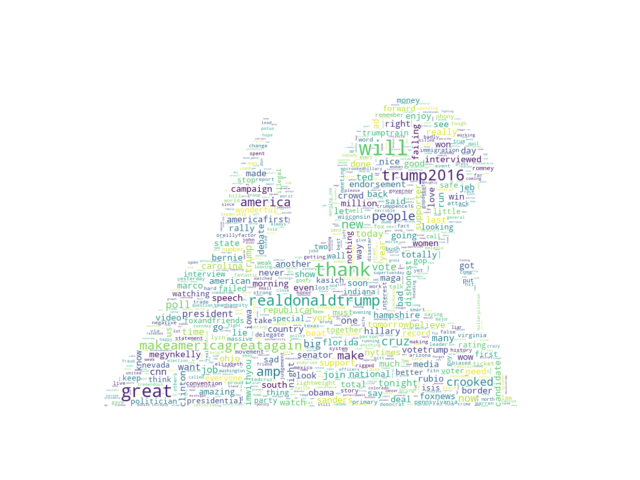

<IPython.core.display.Javascript object>


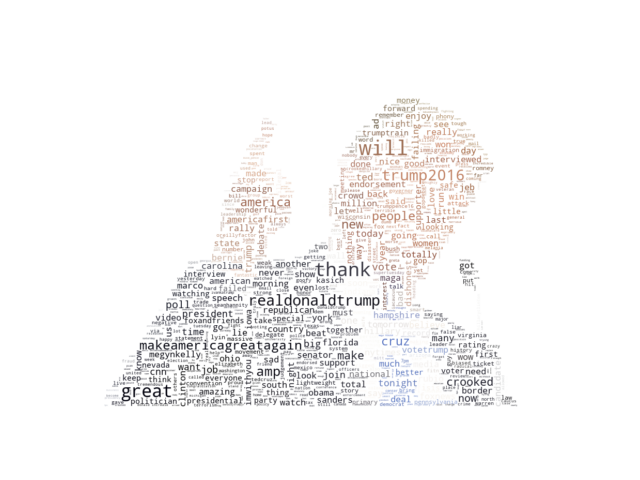

<IPython.core.display.Javascript object>


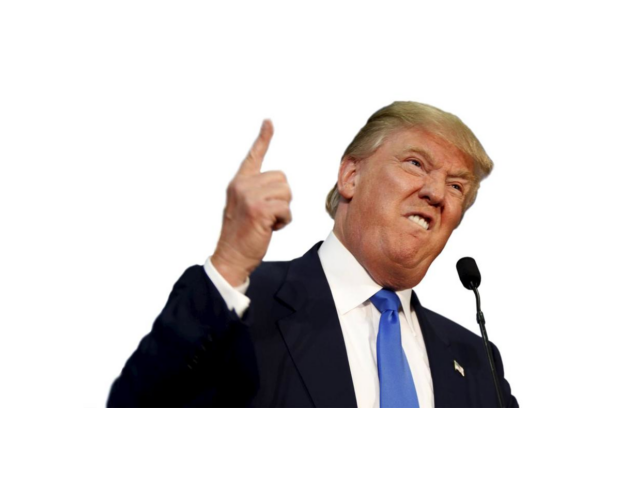

In [11]:
from wordcloud import WordCloud, ImageColorGenerator

from PIL import Image

from os import path

import matplotlib.pyplot as plt

scriptDir = path.dirname('__file__')

impath = path.join(scriptDir,'./data/trump.png')

trump_coloring = np.array(Image.open('./data/Trump.png'))
#plt.imshow(wordcloud)
wc_trump = WordCloud(background_color="white", max_words=1000,
             max_font_size=40, random_state=42, mask = trump_coloring)
# generate word cloud
wc_trump.generate(trump_pop_str)


image_colors = ImageColorGenerator(trump_coloring)

# show
plt.imshow(wc_trump, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_trump.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(trump_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


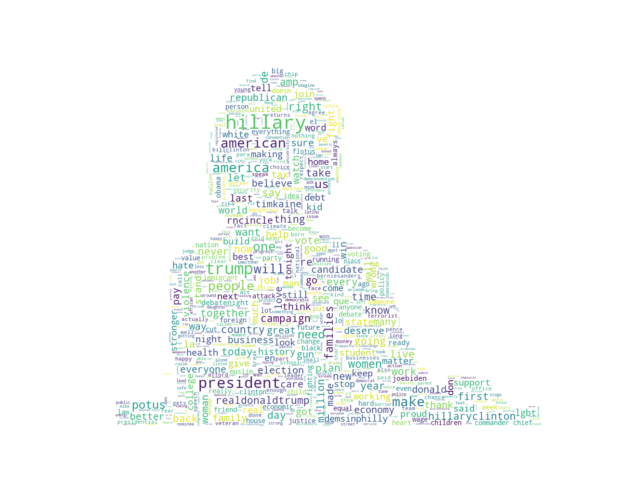

<IPython.core.display.Javascript object>


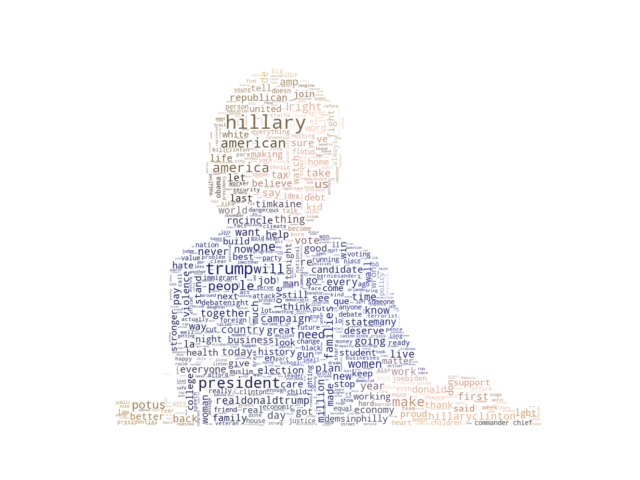

<IPython.core.display.Javascript object>


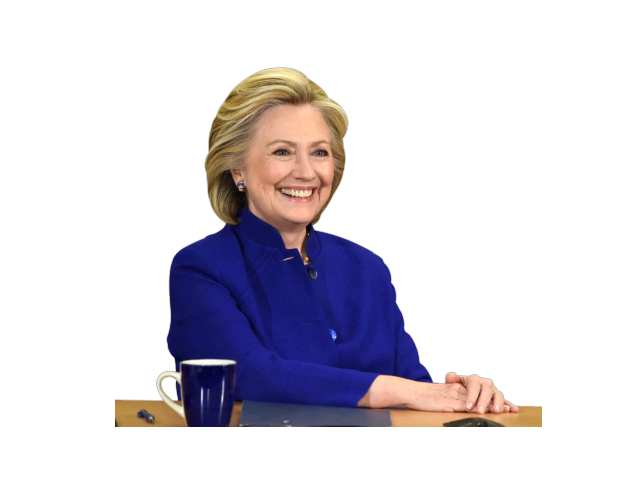

In [15]:

#plt.imshow(wordcloud)
hillary_coloring = np.array(Image.open("./data/hillary-clinton.png"))

#plt.imshow(wordcloud)
wc_hillary = WordCloud(background_color="white", max_words=1000,
             max_font_size=40, random_state=42, mask = hillary_coloring)
# generate word cloud
wc_hillary.generate(hillary_pop_str)
# recolor wordcloud and show
image_colors = ImageColorGenerator(hillary_coloring)

# show
plt.imshow(wc_hillary, interpolation="bilinear")
plt.axis("off")
plt.figure()
# recolor wordcloud and show
plt.imshow(wc_hillary.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(hillary_coloring, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()